Name: Marlapalli Ritika
Reg.No: 20BCB0134
VIT AI-Assignment-3


In [1]:
#Connect drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Unzip the dataset file
!unzip '/content/drive/MyDrive/archive.zip'

Archive:  /content/drive/MyDrive/archive.zip
replace test_data/test_data/blasti/DSC_6396.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
#Data Augmentation
#import required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
#Normalization of data
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255)) 

In [6]:
train = train_gen.flow_from_directory('/content/train_data/train_data', target_size=(120, 120), class_mode='categorical', batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data', target_size=(120, 120), class_mode='categorical', batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [7]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [8]:
#CNN model
#import required libraries
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train,batch_size=8,validation_data=test,epochs=50)

Epoch 1/50
19/19 [==============================] - 97s 5s/step - loss: 2.7823 - accuracy: 0.0600 - val_loss: 2.7555 - val_accuracy: 0.0510
Epoch 2/50
19/19 [==============================] - 87s 5s/step - loss: 2.7499 - accuracy: 0.1133 - val_loss: 2.7547 - val_accuracy: 0.1274
Epoch 3/50
19/19 [==============================] - 120s 7s/step - loss: 2.7183 - accuracy: 0.1467 - val_loss: 2.7602 - val_accuracy: 0.1274
Epoch 4/50
19/19 [==============================] - 87s 5s/step - loss: 2.6097 - accuracy: 0.1733 - val_loss: 2.7653 - val_accuracy: 0.1274
Epoch 5/50
19/19 [==============================] - 89s 5s/step - loss: 2.6312 - accuracy: 0.1267 - val_loss: 2.7187 - val_accuracy: 0.1274
Epoch 6/50
19/19 [==============================] - 122s 7s/step - loss: 2.4948 - accuracy: 0.1933 - val_loss: 2.7039 - val_accuracy: 0.1465
Epoch 7/50
19/19 [==============================] - 87s 5s/step - loss: 2.4704 - accuracy: 0.2133 - val_loss: 2.6374 - val_accuracy: 0.1783
Epoch 8/50
19/19 [

In [12]:
model.save('birdWeights.h5')


In [13]:
#Testing
#import required libraries
import numpy as np
from tensorflow.keras.preprocessing import image



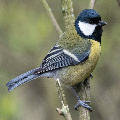

In [14]:
img = image.load_img('/content/image.jpg',target_size=(120,120))
img

In [15]:
#Convert image to array
img = image.img_to_array(img)
img

array([[[137., 132., 112.],
        [133., 129., 104.],
        [128., 124.,  99.],
        ...,
        [ 81.,  79.,  64.],
        [ 86.,  84.,  71.],
        [101., 101.,  89.]],

       [[138., 134., 109.],
        [131., 127., 102.],
        [130., 126.,  99.],
        ...,
        [ 91.,  90.,  70.],
        [ 78.,  75.,  60.],
        [ 93.,  86.,  78.]],

       [[134., 130., 103.],
        [135., 131., 106.],
        [138., 134., 105.],
        ...,
        [109., 109.,  83.],
        [ 86.,  83.,  66.],
        [ 84.,  80.,  68.]],

       ...,

       [[138., 151.,  97.],
        [141., 155.,  96.],
        [140., 154.,  92.],
        ...,
        [122., 118., 106.],
        [117., 113., 102.],
        [117., 113., 102.]],

       [[147., 158., 100.],
        [149., 161.,  99.],
        [140., 155.,  90.],
        ...,
        [118., 114., 103.],
        [120., 116., 105.],
        [118., 114., 105.]],

       [[147., 158.,  98.],
        [153., 165., 101.],
        [146., 1

In [16]:
#Change dimension to 3
img = np.expand_dims(img,axis=0)
img

array([[[[137., 132., 112.],
         [133., 129., 104.],
         [128., 124.,  99.],
         ...,
         [ 81.,  79.,  64.],
         [ 86.,  84.,  71.],
         [101., 101.,  89.]],

        [[138., 134., 109.],
         [131., 127., 102.],
         [130., 126.,  99.],
         ...,
         [ 91.,  90.,  70.],
         [ 78.,  75.,  60.],
         [ 93.,  86.,  78.]],

        [[134., 130., 103.],
         [135., 131., 106.],
         [138., 134., 105.],
         ...,
         [109., 109.,  83.],
         [ 86.,  83.,  66.],
         [ 84.,  80.,  68.]],

        ...,

        [[138., 151.,  97.],
         [141., 155.,  96.],
         [140., 154.,  92.],
         ...,
         [122., 118., 106.],
         [117., 113., 102.],
         [117., 113., 102.]],

        [[147., 158., 100.],
         [149., 161.,  99.],
         [140., 155.,  90.],
         ...,
         [118., 114., 103.],
         [120., 116., 105.],
         [118., 114., 105.]],

        [[147., 158.,  98.],
       

In [17]:
#Prediction
np.argmax(model.predict(img))

1/1 [==============================] - 0s 267ms/step


5